In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\udaya\Downloads\creditcard.csv",header=0)
data.head()


#variables - Amount - predited class 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
#we dont have names of the featues v1-v28 so we cant do feature engineering
#but we can remove time as its not relevant 

data=data.drop(['Time'],axis=1)
# Eliminating Time as a feature as it doesn't contribute much in the outcome

data['Class'].value_counts()

#major data is in 0 (Reject)
#minor data is in 1 (approve / accept )

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Class Distribution'}>

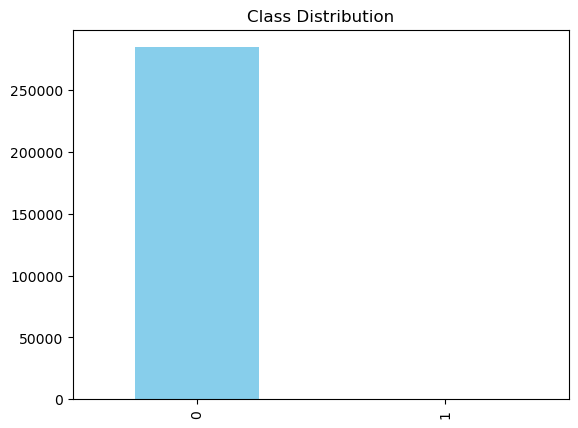

In [6]:
data["Class"].value_counts().plot(
    kind="bar",              # Bar graph
    color=["skyblue", "salmon"],  # Colors for bars
    title="Class Distribution"
)



<AxesSubplot:ylabel='Class'>

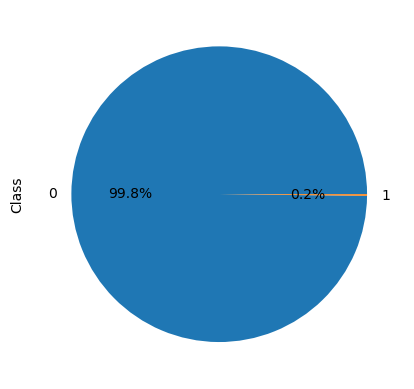

In [7]:

data["Class"].value_counts().plot(      # Count how many times each class label appears, then plot it
    kind="pie",                         # Specify the chart type as 'pie'
    autopct='%1.1f%%'                   # Display the percentage value with 1 decimal place on each slice
)

###From the above plot we can observe tht the data is highly imbalanced in nature

From the above plot we can observe tht the data is highly imbalanced in nature

In [8]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Splitting the data into X & Y
# Separate the features (X) and the target (Y) from the dataset

X = data.values[:, :-1]   # Select all rows and all columns except the last one  feature variables
Y = data.values[:, -1]    # Select all rows and only the last column  target variable (label)


In [10]:
X.shape

(284807, 29)

In [11]:
Y.shape

(284807,)

In [12]:
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()   # Create an object of StandardScaler

scaler.fit(X)               # Compute the mean and standard deviation for each feature in X

X = scaler.transform(X)     # Scale the data: subtract mean and divide by standard deviation for each feature

# X = scaler.fit_transform(X)  # (Shortcut) Performs both fit() and transform() in one step

# print(X)  # (Optional) Prints the scaled feature matrix


In [13]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [14]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0. 0. 0. ... 0. 0. 0.]
[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.

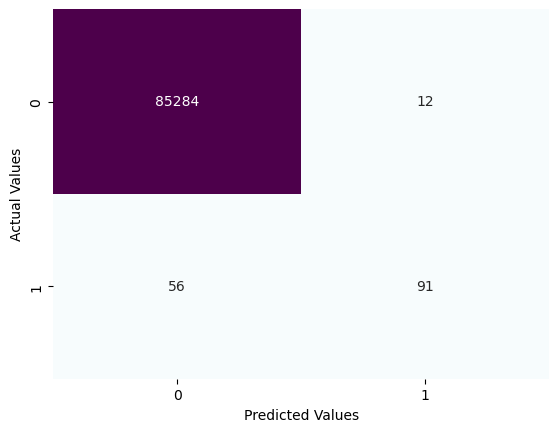

Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of the model:  0.999204147794436


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Import metrics for model evaluation
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix to compare actual vs predicted labels
cfm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix as a heatmap for better readability
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')  
# 'annot=True' adds numbers inside boxes, 'fmt=g' shows as integers
plt.xlabel('Predicted Values')   # X-axis label
plt.ylabel('Actual Values')      # Y-axis label
plt.show()                       # Display the heatmap

# Print the detailed classification report (Precision, Recall, F1-score)
print("Classification report: ")
print(classification_report(Y_test, Y_pred))

# Calculate and print the overall accuracy of the model
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)


# Using Decision Tree

In [16]:
# Predicting using the DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier   # Import the Decision Tree classifier

# Create a Decision Tree model
# criterion="gini"  uses Gini Impurity to measure the quality of splits
# random_state=0 ensures reproducible results
model_DecisionTree = DecisionTreeClassifier(criterion="gini", random_state=0)

# Train (fit) the model on the training data
model_DecisionTree.fit(X_train, Y_train)

# Predict target values for the test data
Y_pred = model_DecisionTree.predict(X_test)

# print(Y_pred)             # (Optional) prints all predicted labels
# print(list(zip(Y_test, Y_pred)))  # (Optional) shows actual vs predicted values side by side


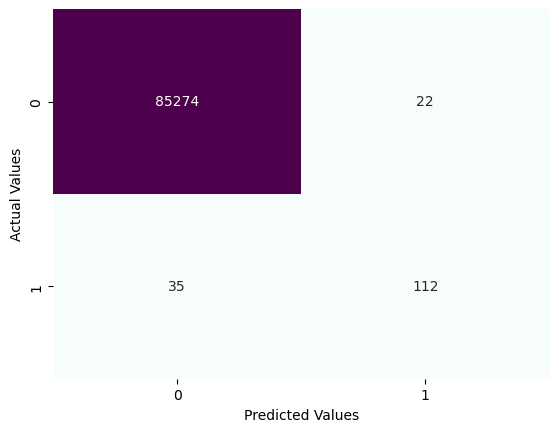

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.84      0.76      0.80       147

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of the model: 0.9993328885923949


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Import evaluation metrics

# Create a confusion matrix comparing actual vs predicted labels
cfm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')  
# annot=True  show values inside cells
# fmt='g'  display values as integers
# cbar=False  hide color bar
# cmap='BuPu'  color palette for visualization

plt.xlabel('Predicted Values')   # Label for X-axis
plt.ylabel('Actual Values')      # Label for Y-axis
plt.show()                       # Display the heatmap

# Print precision, recall, f1-score, and support for each class
print("Classification report:")
print(classification_report(Y_test, Y_pred))

# Calculate and print model accuracy
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:", acc)


In [18]:
print("Training--",model_DecisionTree.score(X_train,Y_train))
print("Testing--",model_DecisionTree.score(X_test,Y_test))

Training-- 1.0
Testing-- 0.9993328885923949


In [19]:
print("Training--",lr.score(X_train,Y_train))
print("Testing--",lr.score(X_test,Y_test))

Training-- 0.9992024638349953
Testing-- 0.999204147794436


# Over Sampling

In [20]:
# Calculate the percentage distribution of each class in the 'Class' column

data.Class.value_counts(normalize=True) * 100  
# value_counts()  counts how many times each class appears  
# normalize=True  converts counts to proportions (fractions of total)  


0    99.827251
1     0.172749
Name: Class, dtype: float64

0    0.739797
1    0.260203
Name: Class, dtype: float64


<AxesSubplot:ylabel='Class'>

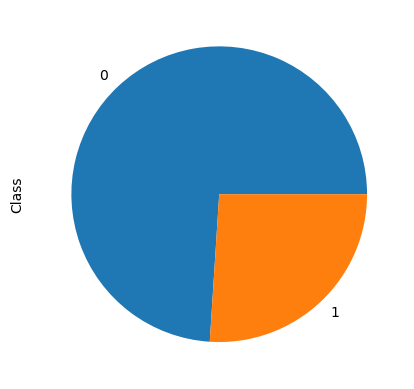

In [21]:
from sklearn.utils import resample   # Import resample for upsampling minority class

# Separate the majority and minority classes based on the 'Class' column
df_majority = data[data.Class == 0]   # Majority class (Class = 0)
df_minority = data[data.Class == 1]   # Minority class (Class = 1)

# Perform upsampling on the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,        # Allow sampling with replacement
                                 n_samples=100000,    # Create samples equal to majority class size
                                 random_state=0)     # Ensure reproducible results

# Combine the majority class with the newly upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the new class distribution (normalized for percentages)
print(df_upsampled.Class.value_counts(normalize=True))

# Plot the new class distribution as a pie chart
df_upsampled.Class.value_counts().plot(kind="pie")


In [22]:
# the new data set we created with new data upsample (data size increased )
df_upsampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142557,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
276071,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,0.249311,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
157868,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,-5.208335,...,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,0.76,1
263080,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1


In [23]:
#applying the models in the up sampled data 

X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]

In [24]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [25]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [26]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0. 1. 1. ... 0. 0. 0.]
[(0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#precision , recall , f1 score has increased - 

[[84655   701]
 [ 3275 26664]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     85356
         1.0       0.97      0.89      0.93     29939

    accuracy                           0.97    115295
   macro avg       0.97      0.94      0.95    115295
weighted avg       0.97      0.97      0.96    115295

Accuracy of the model:  0.9655145496335488


In [28]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[85310    46]
 [    0 29939]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85356
         1.0       1.00      1.00      1.00     29939

    accuracy                           1.00    115295
   macro avg       1.00      1.00      1.00    115295
weighted avg       1.00      1.00      1.00    115295

Accuracy of the model:  0.9996010234615551


In [30]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=5,random_state=0,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.96706565 0.96665675 0.9656717  0.96570887 0.96615493]
0.9662515798081927


# Undersampling

In [31]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data[data.Class==0]
df_minority = data[data.Class==1]

# Upsample minority class
df_majority_upsampled = resample(df_majority,     #undersampling - 
                                 replace=True,     # sample with replacement
                                 n_samples=400,    # to match majority class -data loss will be a problem 
                                 random_state=0) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_upsampled])

# Display new class counts
df_upsampled.Class.value_counts()

1    492
0    400
Name: Class, dtype: int64

In [32]:
#creating model with undersampled data 
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [34]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [35]:
print(len(X_train))

624


In [36]:
#from Logistic Regression.
from sklearn.linear_model import LogisticRegression
#create a model object
lr=LogisticRegression()
#fitting training data to the model
lr.fit(X_train,Y_train)

Y_pred=lr.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1.]
[(0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

#data loss can lead to underfitting - does not happen in this case but is a major issue 

[[113   2]
 [ 16 137]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       115
         1.0       0.99      0.90      0.94       153

    accuracy                           0.93       268
   macro avg       0.93      0.94      0.93       268
weighted avg       0.94      0.93      0.93       268

Accuracy of the model:  0.9328358208955224


# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
#imbalanced-learn

In [39]:
X=data.values[:,:-1]
Y=data.values[:,-1]

In [40]:

from sklearn.preprocessing import StandardScaler  # Import StandardScaler to standardize features

scaler = StandardScaler()       # Create an instance of the StandardScaler

scaler.fit(X)                   # Calculate the mean and standard deviation for each feature in X

X = scaler.transform(X)         # Use the calculated mean and std to scale (standardize) the features in X

# X = scaler.fit_transform(X)   # This single line does both fit() and transform() together
# print(X)                      # To display the standardized values



In [41]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [42]:
# Print the count of minority (label '1') and majority (label '0') classes before oversampling
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# Import SMOTE (Synthetic Minority Over-sampling Technique) from imblearn
# SMOTE creates synthetic samples for the minority class to balance the dataset
from imblearn.over_sampling import SMOTE

# Create a SMOTE object with random_state for reproducibility and k_neighbors=5 (default)
sm = SMOTE(random_state=0, k_neighbors=5)

# Fit SMOTE on the training data and create a new balanced dataset
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

#fit()  learns how to resample (Ex: which class is minority/majority)
#resample() actually creates the new balanced dataset
#So fit_resample = fit + resample in one step.

# Print the new shape (number of rows and columns) of X and Y after oversampling
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

# Print the updated count of both classes after SMOTE balancing
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))


Before OverSampling, counts of label '1':  345
Before OverSampling, counts of label '0':  199019
After OverSampling, the shape of train_X:  (398038, 29)
After OverSampling, the shape of train_y:  (398038,)
After OverSampling, counts of label '1':  199019
After OverSampling, counts of label '0':  199019


In [43]:
# Import Logistic Regression algorithm from sklearn
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model object
lr = LogisticRegression()

# Train the model using the oversampled training data
# Model learns patterns between X_train_res (features) and Y_train_res (labels)
lr.fit(X_train_res, Y_train_res)

# Use the trained model to predict labels for the test data
Y_pred = lr.predict(X_test)


In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[83218  2078]
 [   12   135]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy of the model:  0.9755392483878141


In [45]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=0)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train_res,Y_train_res)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[85093   203]
 [   34   113]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.36      0.77      0.49       147

    accuracy                           1.00     85443
   macro avg       0.68      0.88      0.74     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of the model:  0.9972262209894316
